In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

country = pd.read_csv("data/diab_countries.csv")
country

,Country/Region/World,ISO,Sex,Year,Crude diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1980,0.028291,0.008573,0.064234
1,Afghanistan,AFG,Men,1981,0.028931,0.009486,0.062902
2,Afghanistan,AFG,Men,1982,0.029537,0.010453,0.062017
3,Afghanistan,AFG,Men,1983,0.030114,0.011449,0.061258
4,Afghanistan,AFG,Men,1984,0.030696,0.012390,0.060015
...,...,...,...,...,...,...,...
13645,Zimbabwe,ZWE,Women,2010,0.051307,0.031445,0.077909
13646,Zimbabwe,ZWE,Women,2011,0.051488,0.030320,0.079546
13647,Zimbabwe,ZWE,Women,2012,0.051646,0.029301,0.081563
13648,Zimbabwe,ZWE,Women,2013,0.051833,0.028252,0.084597


In [3]:
country['Country/Region/World'].value_counts()

Country/Region/World
Afghanistan    70
Saint Lucia    70
Niger          70
Nigeria        70
Niue           70
               ..
Greece         70
Grenada        70
Guatemala      70
Guinea         70
Zimbabwe       70
Name: count, Length: 195, dtype: int64

In [4]:
country['Year'].value_counts()

Year
1980    390
2006    390
2000    390
2001    390
2002    390
2003    390
2004    390
2005    390
2007    390
1998    390
2008    390
2009    390
2010    390
2011    390
2012    390
2013    390
1999    390
1997    390
1981    390
1988    390
1982    390
1983    390
1984    390
1985    390
1986    390
1987    390
1989    390
1996    390
1990    390
1991    390
1992    390
1993    390
1994    390
1995    390
2014    390
Name: count, dtype: int64

In [5]:
# 2001년과 2014년 데이터 필터링
diab_2001 = country[country['Year'] == 2001]
diab_2014 = country[country['Year'] == 2014]

# 두 데이터프레임을 나라와 성별 기준으로 병합
merged_df = pd.merge(diab_2001, diab_2014, on=['Country/Region/World', 'Sex'], suffixes=('_2001', '_2014'))

# 'Crude diabetes prevalence'의 변화 계산
merged_df['Change'] = merged_df['Crude diabetes prevalence_2014'] - merged_df['Crude diabetes prevalence_2001']

# 나라별 남녀 평균 변화량 계산
diab_res = merged_df.groupby('Country/Region/World')['Change'].mean().reset_index()

diab_res

,Country/Region/World,Change
0,Afghanistan,0.026188
1,Albania,0.023339
2,Algeria,0.038560
3,Andorra,0.006332
4,Angola,0.020064
...,...,...
190,Venezuela,0.015032
191,Viet Nam,0.011669
192,Yemen,0.026601
193,Zambia,0.008947


In [4]:
features = pd.read_csv("data/lifeexpectancy.csv")
features

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.000000,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.000000,7.139524,3.45870,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.000000,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.000000,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.77788,1.801000,3.0,NaN,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.70625,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014648,9.109355,5.91771,28.469999,NaN,NaN,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,NaN,6800.000191,5.312203,4.46518,12.520000,2.5,NaN,510982.75,4837094.00,2649687.82


In [7]:
features['Country Code'].value_counts()

Country Code
AFG    19
NPL    19
MWI    19
MYS    19
NAM    19
       ..
GNB    19
GNQ    19
GRC    19
GRD    19
ZWE    19
Name: count, Length: 174, dtype: int64

In [8]:
features['Year'].value_counts()

Year
2001    174
2011    174
2018    174
2017    174
2016    174
2015    174
2014    174
2013    174
2012    174
2010    174
2002    174
2009    174
2008    174
2007    174
2006    174
2005    174
2004    174
2003    174
2019    174
Name: count, dtype: int64

In [9]:
features['IncomeGroup'].value_counts()

IncomeGroup
High income            1083
Upper middle income     931
Lower middle income     855
Low income              437
Name: count, dtype: int64

In [6]:
features['Country Name'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada', 'Switzerland',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Colombia',
       'Comoros', 'Costa Rica', 'Cuba', 'Cyprus', 'Germany', 'Djibouti',
       'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada',
       'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Honduras', 'Croatia',
       'Haiti', 'Hungary', 'Ind

### 여기서 문제!
- 나라별로 얼마나 변화량이 있는가를 알아보려면, 정책에도 어떤 변화가 있는지 알아야 되겠지?
- 그래서 처음에 변화량과 변화량을 비교해보기로 했던 거였어.
- 그런데 이렇게 모델을 만들면, 나오는 결과가 변화량임?
- 우리는 당뇨병 발병률을 예측하고자 하던 거 아니었어?
- 2001년 시작 기준을 한다고 해도, 우리는 2014년 발병 예측률밖에 몰라

### 주제 : 나라별 시간대에 따른 당뇨병 발병률과 사회경제적 요인의 시계열 분석
### 목표
1. 패턴 및 트렌드 식별: 각 나라에서 당뇨병 발병률의 시간에 따른 패턴 및 트렌드를 식별합니다. 예를 들어, 발병률이 증가하는 시기나 감소하는 시기를 찾아냅니다.
2. 사회경제적 요인과의 관계 파악: GDP, 의료 접근성, 교육 수준, 실업률 등과 같은 사회경제적 요인이 당뇨병 발병률에 미치는 영향을 분석합니다. 이를 통해 어떤 요인이 발병률의 증가나 감소와 가장 강력한 연관성을 가지는지를 파악합니다.
3. 시간 지연 효과 분석: 사회경제적 변화가 당뇨병 발병률에 영향을 미치는 데까지 얼마나 시간이 걸리는지를 분석합니다. 예를 들어, 경제 상황의 개선 후 몇 년 뒤에 건강 지표에 긍정적인 변화가 나타나는지 조사합니다.
4. 예측 모델 개발: 과거 데이터를 바탕으로 미래의 당뇨병 발병률을 예측합니다. 이 예측은 정부나 보건 기관이 미래에 필요할 수 있는 자원과 정책 조정에 도움을 줄 수 있습니다.
정책 개발 지원: 분석 결과를 바탕으로 보다 효과적인 공중 보건 정책과 개입 전략을 설계할 수 있도록 권장사항을 제공합니다.
### 방법론
LSTM(Long Short-Term Memory) 네트워크를 사용하여 나라별 당뇨병 발병률을 예측하는 프로젝트를 구현하기 위해 필요한 단계를 설명하고, 이에 따른 코드를 제공하겠습니다. LSTM은 시퀀스 데이터에 잘 작동하는 딥러닝 모델로, 시계열 데이터의 장기적인 종속성을 학습하는 데 효과적입니다.

In [59]:
### 데이터 전처리
# 당뇨병 데이터에서 2001년부터 2014년 데이터 추출 및 남녀 평균 발병률 계산
df_diab = country[(country['Year'] >= 2001) & (country['Year'] <= 2014)]
df_diab_avg = df_diab.groupby(['Country/Region/World', 'Year'])['Crude diabetes prevalence'].mean().reset_index()

# 사회경제적 요인 데이터에서 2001년부터 2014년 데이터 추출 및 IncomeGroup 변환
features = features[(features['Year'] >= 2001) & (features['Year'] <= 2014)]
income_group_mapping = {
    'High income': 4,
    'Upper middle income': 3,
    'Lower middle income': 2,
    'Low income': 1
}
features['IncomeGroup'] = features['IncomeGroup'].map(income_group_mapping)


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_8397/2396464273.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['IncomeGroup'] = features['IncomeGroup'].map(income_group_mapping)


In [60]:
# 사회경제적 요인 데이터에 존재하는 국가들 필터링
valid_countries = features['Country Name'].unique()

# 당뇨병 발병률 데이터에서 해당 국가들만 필터링
df_diab_filtered = df_diab_avg[df_diab_avg['Country/Region/World'].isin(valid_countries)]

# 두 데이터 프레임 병합
final_df = pd.merge(df_diab_filtered, features, how='inner', left_on=['Country/Region/World', 'Year'], right_on=['Country Name', 'Year'])

# 결과 확인 및 저장
final_df.head()
# final_df.to_csv('final_merged_data.csv', index=False)


,Country/Region/World,Year,Crude diabetes prevalence,Country Name,Country Code,Region,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,2001,0.057947,Afghanistan,AFG,South Asia,1,56.308,47.8,730.000000,NaN,NaN,10.809,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Afghanistan,2002,0.059601,Afghanistan,AFG,South Asia,1,56.784,45.6,1029.999971,9.443390,NaN,11.257,NaN,NaN,1946983.65,9858324.98,5871595.71
2,Afghanistan,2003,0.061341,Afghanistan,AFG,South Asia,1,57.271,40.6,1220.000029,8.941258,NaN,11.141,NaN,NaN,1992263.52,9157600.44,6166298.79
3,Afghanistan,2004,0.063123,Afghanistan,AFG,South Asia,1,57.772,38.0,1029.999971,9.808474,NaN,10.988,NaN,NaN,2050765.02,8791000.56,6315336.43
4,Afghanistan,2005,0.065008,Afghanistan,AFG,South Asia,1,58.290,36.1,1549.999952,9.948290,2.57,11.217,NaN,NaN,2157481.76,8555405.22,6353575.08


In [12]:
# 각 칼럼별 NaN 값의 개수 계산
nan_counts = final_df.isnull().sum()

# 결과 출력
print(nan_counts)

Country/Region/World                 0
Year                                 0
Crude diabetes prevalence            0
Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Life Expectancy World Bank          82
Prevelance of Undernourishment     378
CO2                                 14
Health Expenditure %                53
Education Expenditure %            750
Unemployment                       140
Corruption                        1613
Sanitation                         818
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64


In [13]:
len(final_df)

2254

In [61]:
# 총 길이가 2254인데, Corruption은 NaN값이 너무 많아서 변수 제거
final_df = final_df.drop(['Corruption'], axis=1)
final_df

,Country/Region/World,Year,Crude diabetes prevalence,Country Name,Country Code,Region,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,2001,0.057947,Afghanistan,AFG,South Asia,1,56.308,47.8,730.000000,NaN,NaN,10.809,NaN,2179727.10,9689193.70,5795426.38
1,Afghanistan,2002,0.059601,Afghanistan,AFG,South Asia,1,56.784,45.6,1029.999971,9.443390,NaN,11.257,NaN,1946983.65,9858324.98,5871595.71
2,Afghanistan,2003,0.061341,Afghanistan,AFG,South Asia,1,57.271,40.6,1220.000029,8.941258,NaN,11.141,NaN,1992263.52,9157600.44,6166298.79
3,Afghanistan,2004,0.063123,Afghanistan,AFG,South Asia,1,57.772,38.0,1029.999971,9.808474,NaN,10.988,NaN,2050765.02,8791000.56,6315336.43
4,Afghanistan,2005,0.065008,Afghanistan,AFG,South Asia,1,58.290,36.1,1549.999952,9.948290,2.57000,11.217,NaN,2157481.76,8555405.22,6353575.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,Zimbabwe,2010,0.044912,Zimbabwe,ZWE,Sub-Saharan Africa,2,50.640,NaN,9600.000381,10.475839,1.54406,5.209,28.640373,522321.99,6911187.16,2026311.50
2250,Zimbabwe,2011,0.045151,Zimbabwe,ZWE,Sub-Saharan Africa,2,52.896,NaN,11409.999847,8.081738,NaN,5.370,28.346608,535671.86,6198229.83,2047951.44
2251,Zimbabwe,2012,0.045404,Zimbabwe,ZWE,Sub-Saharan Africa,2,55.032,NaN,12010.000229,6.918354,6.07021,5.153,28.054425,538461.92,5658194.13,2073488.75
2252,Zimbabwe,2013,0.045713,Zimbabwe,ZWE,Sub-Saharan Africa,2,56.897,NaN,12279.999733,7.110148,5.99598,4.982,27.763704,540075.16,5320259.07,2091782.64


In [62]:
final_df = final_df.drop(['Country/Region/World'], axis=1)
final_df

,Year,Crude diabetes prevalence,Country Name,Country Code,Region,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
0,2001,0.057947,Afghanistan,AFG,South Asia,1,56.308,47.8,730.000000,NaN,NaN,10.809,NaN,2179727.10,9689193.70,5795426.38
1,2002,0.059601,Afghanistan,AFG,South Asia,1,56.784,45.6,1029.999971,9.443390,NaN,11.257,NaN,1946983.65,9858324.98,5871595.71
2,2003,0.061341,Afghanistan,AFG,South Asia,1,57.271,40.6,1220.000029,8.941258,NaN,11.141,NaN,1992263.52,9157600.44,6166298.79
3,2004,0.063123,Afghanistan,AFG,South Asia,1,57.772,38.0,1029.999971,9.808474,NaN,10.988,NaN,2050765.02,8791000.56,6315336.43
4,2005,0.065008,Afghanistan,AFG,South Asia,1,58.290,36.1,1549.999952,9.948290,2.57000,11.217,NaN,2157481.76,8555405.22,6353575.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,2010,0.044912,Zimbabwe,ZWE,Sub-Saharan Africa,2,50.640,NaN,9600.000381,10.475839,1.54406,5.209,28.640373,522321.99,6911187.16,2026311.50
2250,2011,0.045151,Zimbabwe,ZWE,Sub-Saharan Africa,2,52.896,NaN,11409.999847,8.081738,NaN,5.370,28.346608,535671.86,6198229.83,2047951.44
2251,2012,0.045404,Zimbabwe,ZWE,Sub-Saharan Africa,2,55.032,NaN,12010.000229,6.918354,6.07021,5.153,28.054425,538461.92,5658194.13,2073488.75
2252,2013,0.045713,Zimbabwe,ZWE,Sub-Saharan Africa,2,56.897,NaN,12279.999733,7.110148,5.99598,4.982,27.763704,540075.16,5320259.07,2091782.64


In [16]:
final_df.columns

Index(['Year', 'Crude diabetes prevalence', 'Country Name', 'Country Code',
       'Region', 'IncomeGroup', 'Life Expectancy World Bank',
       'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %',
       'Education Expenditure %', 'Unemployment', 'Sanitation', 'Injuries',
       'Communicable', 'NonCommunicable'],
      dtype='object')

In [63]:
final_df = final_df[['Year', 'Country Name', 'Country Code','Crude diabetes prevalence',
       'Region', 'IncomeGroup', 'Life Expectancy World Bank',
       'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %',
       'Education Expenditure %', 'Unemployment', 'Sanitation', 'Injuries',
       'Communicable', 'NonCommunicable']]
final_df

,Year,Country Name,Country Code,Crude diabetes prevalence,Region,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
0,2001,Afghanistan,AFG,0.057947,South Asia,1,56.308,47.8,730.000000,NaN,NaN,10.809,NaN,2179727.10,9689193.70,5795426.38
1,2002,Afghanistan,AFG,0.059601,South Asia,1,56.784,45.6,1029.999971,9.443390,NaN,11.257,NaN,1946983.65,9858324.98,5871595.71
2,2003,Afghanistan,AFG,0.061341,South Asia,1,57.271,40.6,1220.000029,8.941258,NaN,11.141,NaN,1992263.52,9157600.44,6166298.79
3,2004,Afghanistan,AFG,0.063123,South Asia,1,57.772,38.0,1029.999971,9.808474,NaN,10.988,NaN,2050765.02,8791000.56,6315336.43
4,2005,Afghanistan,AFG,0.065008,South Asia,1,58.290,36.1,1549.999952,9.948290,2.57000,11.217,NaN,2157481.76,8555405.22,6353575.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,2010,Zimbabwe,ZWE,0.044912,Sub-Saharan Africa,2,50.640,NaN,9600.000381,10.475839,1.54406,5.209,28.640373,522321.99,6911187.16,2026311.50
2250,2011,Zimbabwe,ZWE,0.045151,Sub-Saharan Africa,2,52.896,NaN,11409.999847,8.081738,NaN,5.370,28.346608,535671.86,6198229.83,2047951.44
2251,2012,Zimbabwe,ZWE,0.045404,Sub-Saharan Africa,2,55.032,NaN,12010.000229,6.918354,6.07021,5.153,28.054425,538461.92,5658194.13,2073488.75
2252,2013,Zimbabwe,ZWE,0.045713,Sub-Saharan Africa,2,56.897,NaN,12279.999733,7.110148,5.99598,4.982,27.763704,540075.16,5320259.07,2091782.64


In [64]:
final_df.sort_values(by=['Country Name', 'Year'], inplace=True)

In [65]:
final_df

,Year,Country Name,Country Code,Crude diabetes prevalence,Region,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
0,2001,Afghanistan,AFG,0.057947,South Asia,1,56.308,47.8,730.000000,NaN,NaN,10.809,NaN,2179727.10,9689193.70,5795426.38
1,2002,Afghanistan,AFG,0.059601,South Asia,1,56.784,45.6,1029.999971,9.443390,NaN,11.257,NaN,1946983.65,9858324.98,5871595.71
2,2003,Afghanistan,AFG,0.061341,South Asia,1,57.271,40.6,1220.000029,8.941258,NaN,11.141,NaN,1992263.52,9157600.44,6166298.79
3,2004,Afghanistan,AFG,0.063123,South Asia,1,57.772,38.0,1029.999971,9.808474,NaN,10.988,NaN,2050765.02,8791000.56,6315336.43
4,2005,Afghanistan,AFG,0.065008,South Asia,1,58.290,36.1,1549.999952,9.948290,2.57000,11.217,NaN,2157481.76,8555405.22,6353575.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,2010,Zimbabwe,ZWE,0.044912,Sub-Saharan Africa,2,50.640,NaN,9600.000381,10.475839,1.54406,5.209,28.640373,522321.99,6911187.16,2026311.50
2250,2011,Zimbabwe,ZWE,0.045151,Sub-Saharan Africa,2,52.896,NaN,11409.999847,8.081738,NaN,5.370,28.346608,535671.86,6198229.83,2047951.44
2251,2012,Zimbabwe,ZWE,0.045404,Sub-Saharan Africa,2,55.032,NaN,12010.000229,6.918354,6.07021,5.153,28.054425,538461.92,5658194.13,2073488.75
2252,2013,Zimbabwe,ZWE,0.045713,Sub-Saharan Africa,2,56.897,NaN,12279.999733,7.110148,5.99598,4.982,27.763704,540075.16,5320259.07,2091782.64


### NaN값 변수들 처리
- 일단 중요한 변수들 같아서 그대로 남겨두고 모든 값이 난 값인 나라들을 지워보기로 함

In [20]:
# 각 나라별로 그룹화하고 Value 칼럼이 모두 NaN인지 확인
all_nan_countries = final_df.groupby('Country Name')['Sanitation'].apply(lambda x: x.isnull().all())

# 모두 NaN인 나라만 필터링
all_nan_countries = all_nan_countries[all_nan_countries].index.tolist()

# print("Countries where 'Value' is NaN across all years:", all_nan_countries)

# len(all_nan_countries)

# 해당 나라들을 제거
final_df = final_df[~final_df['Country Name'].isin(all_nan_countries)]

In [21]:
# 각 나라별로 그룹화하고 Value 칼럼이 모두 NaN인지 확인
all_nan_countries = final_df.groupby('Country Name')['Life Expectancy World Bank'].apply(lambda x: x.isnull().all())

# 모두 NaN인 나라만 필터링
all_nan_countries = all_nan_countries[all_nan_countries].index.tolist()

# 해당 나라들을 제거
final_df = final_df[~final_df['Country Name'].isin(all_nan_countries)]

In [22]:
# 각 나라별로 그룹화하고 Value 칼럼이 모두 NaN인지 확인
all_nan_countries = final_df.groupby('Country Name')['Prevelance of Undernourishment'].apply(lambda x: x.isnull().all())

# 모두 NaN인 나라만 필터링
all_nan_countries = all_nan_countries[all_nan_countries].index.tolist()

# 해당 나라들을 제거
final_df = final_df[~final_df['Country Name'].isin(all_nan_countries)]

In [23]:
# 각 나라별로 그룹화하고 Value 칼럼이 모두 NaN인지 확인
all_nan_countries = final_df.groupby('Country Name')['Health Expenditure %'].apply(lambda x: x.isnull().all())

# 모두 NaN인 나라만 필터링
all_nan_countries = all_nan_countries[all_nan_countries].index.tolist()

# 해당 나라들을 제거
final_df = final_df[~final_df['Country Name'].isin(all_nan_countries)]

In [24]:
# 각 나라별로 그룹화하고 Value 칼럼이 모두 NaN인지 확인
all_nan_countries = final_df.groupby('Country Name')['Education Expenditure %'].apply(lambda x: x.isnull().all())

# 모두 NaN인 나라만 필터링
all_nan_countries = all_nan_countries[all_nan_countries].index.tolist()

# 해당 나라들을 제거
final_df = final_df[~final_df['Country Name'].isin(all_nan_countries)]

In [25]:
# 각 나라별로 그룹화하고 Value 칼럼이 모두 NaN인지 확인
all_nan_countries = final_df.groupby('Country Name')['Unemployment'].apply(lambda x: x.isnull().all())

# 모두 NaN인 나라만 필터링
all_nan_countries = all_nan_countries[all_nan_countries].index.tolist()

# 해당 나라들을 제거
final_df = final_df[~final_df['Country Name'].isin(all_nan_countries)]

In [26]:
final_df[['Country Name']].value_counts()

Country Name  
Albania           14
Peru              14
Norway            14
New Zealand       14
Netherlands       14
                  ..
Estonia           14
Ecuador           14
Djibouti          14
Denmark           14
United Kingdom    14
Name: count, Length: 83, dtype: int64

In [27]:
# 각 칼럼별 NaN 값의 개수 계산
nan_counts = final_df.isnull().sum()

# 결과 출력
print(nan_counts)

# Education Expenditure는 아직 난값 있으므로 interpolate 보강법으로 보강해주자

Year                                0
Country Name                        0
Country Code                        0
Crude diabetes prevalence           0
Region                              0
IncomeGroup                         0
Life Expectancy World Bank          0
Prevelance of Undernourishment      0
CO2                                 0
Health Expenditure %                0
Education Expenditure %           218
Unemployment                        0
Sanitation                          0
Injuries                            0
Communicable                        0
NonCommunicable                     0
dtype: int64


In [28]:
# 나라별로 그룹화하고 Value 칼럼에 대해 선형 보간 수행

s = final_df.groupby('Country Name')['Education Expenditure %'].apply(lambda x: x.ffill().bfill())
df_series = s.reset_index()
df_series.columns = ['Country Name', 'ID', 'Education Expenditure %']

df_series = df_series.drop(['ID'], axis=1)
df_series

,Country Name,Education Expenditure %
0,Albania,3.45870
1,Albania,3.11780
2,Albania,3.13823
3,Albania,3.22752
4,Albania,3.28155
...,...,...
1157,United Kingdom,5.66824
1158,United Kingdom,5.55960
1159,United Kingdom,5.55960
1160,United Kingdom,5.50078


In [29]:
# 데이터프레임 병합
final_df = final_df.drop(['Education Expenditure %'], axis=1)
preprocess = pd.merge(final_df, df_series, on=['Country Name'], how='left')
preprocess

,Year,Country Name,Country Code,Crude diabetes prevalence,Region,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable,Education Expenditure %
0,2001,Albania,ALB,0.059201,Europe & Central Asia,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.45870
1,2001,Albania,ALB,0.059201,Europe & Central Asia,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.11780
2,2001,Albania,ALB,0.059201,Europe & Central Asia,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.13823
3,2001,Albania,ALB,0.059201,Europe & Central Asia,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.22752
4,2001,Albania,ALB,0.059201,Europe & Central Asia,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.28155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16263,2014,United Kingdom,GBR,0.076705,Europe & Central Asia,4,81.304878,2.5,415600.006104,9.950413,6.110000,98.012224,1200015.45,980262.38,16410158.58,5.66824
16264,2014,United Kingdom,GBR,0.076705,Europe & Central Asia,4,81.304878,2.5,415600.006104,9.950413,6.110000,98.012224,1200015.45,980262.38,16410158.58,5.55960
16265,2014,United Kingdom,GBR,0.076705,Europe & Central Asia,4,81.304878,2.5,415600.006104,9.950413,6.110000,98.012224,1200015.45,980262.38,16410158.58,5.55960
16266,2014,United Kingdom,GBR,0.076705,Europe & Central Asia,4,81.304878,2.5,415600.006104,9.950413,6.110000,98.012224,1200015.45,980262.38,16410158.58,5.50078


In [30]:
# 각 칼럼별 NaN 값의 개수 계산
nan_counts = preprocess.isnull().sum()

# 결과 출력
print(nan_counts)

Year                              0
Country Name                      0
Country Code                      0
Crude diabetes prevalence         0
Region                            0
IncomeGroup                       0
Life Expectancy World Bank        0
Prevelance of Undernourishment    0
CO2                               0
Health Expenditure %              0
Unemployment                      0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
Education Expenditure %           0
dtype: int64


In [31]:
preprocess = preprocess.drop(['Region', 'Country Code'], axis=1)

In [32]:
preprocess.columns

Index(['Year', 'Country Name', 'Crude diabetes prevalence', 'IncomeGroup',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Unemployment', 'Sanitation', 'Injuries',
       'Communicable', 'NonCommunicable', 'Education Expenditure %'],
      dtype='object')

In [33]:
preprocess.to_csv('filtered_data.csv', index=False)


### 데이터 준비

In [3]:
data = pd.read_csv("filtered_data.csv")
data

,Year,Country Name,Crude diabetes prevalence,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable,Education Expenditure %
0,2001,Albania,0.059201,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.45870
1,2001,Albania,0.059201,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.11780
2,2001,Albania,0.059201,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.13823
3,2001,Albania,0.059201,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.22752
4,2001,Albania,0.059201,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.28155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16263,2014,United Kingdom,0.076705,4,81.304878,2.5,415600.006104,9.950413,6.110000,98.012224,1200015.45,980262.38,16410158.58,5.66824
16264,2014,United Kingdom,0.076705,4,81.304878,2.5,415600.006104,9.950413,6.110000,98.012224,1200015.45,980262.38,16410158.58,5.55960
16265,2014,United Kingdom,0.076705,4,81.304878,2.5,415600.006104,9.950413,6.110000,98.012224,1200015.45,980262.38,16410158.58,5.55960
16266,2014,United Kingdom,0.076705,4,81.304878,2.5,415600.006104,9.950413,6.110000,98.012224,1200015.45,980262.38,16410158.58,5.50078


In [1]:
variables = preprocess.drop(['Year', 'Country Name'], axis=1)
variables.to_csv('variables.csv', index=False)

NameError: name 'preprocess' is not defined

In [42]:
features['Country Name'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada', 'Switzerland',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Colombia',
       'Comoros', 'Costa Rica', 'Cuba', 'Cyprus', 'Germany', 'Djibouti',
       'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada',
       'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Honduras', 'Croatia',
       'Haiti', 'Hungary', 'Ind

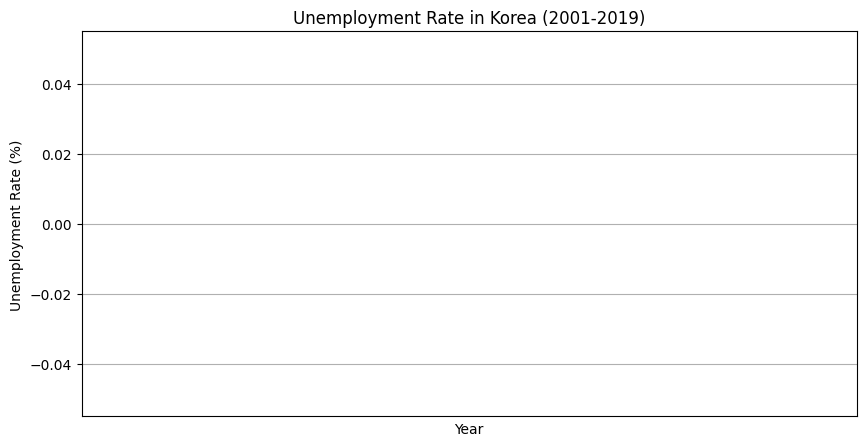

In [41]:
import matplotlib.pyplot as plt

korea = features[features['Country Name'] == 'South Korea']

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(korea['Year'], korea['Unemployment'], marker='o', linestyle='-', color='b')
plt.title('Unemployment Rate in Korea (2001-2019)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(korea['Year'])  # X축의 눈금을 연도로 설정
plt.show()

### 실업률과 당뇨병의 관계?
실업이 건강에 미치는 영향 - 고혈압 및 당뇨의 질병진단을 중심으로-(https://s-space.snu.ac.kr/handle/10371/134694)
- 아마 시계열?

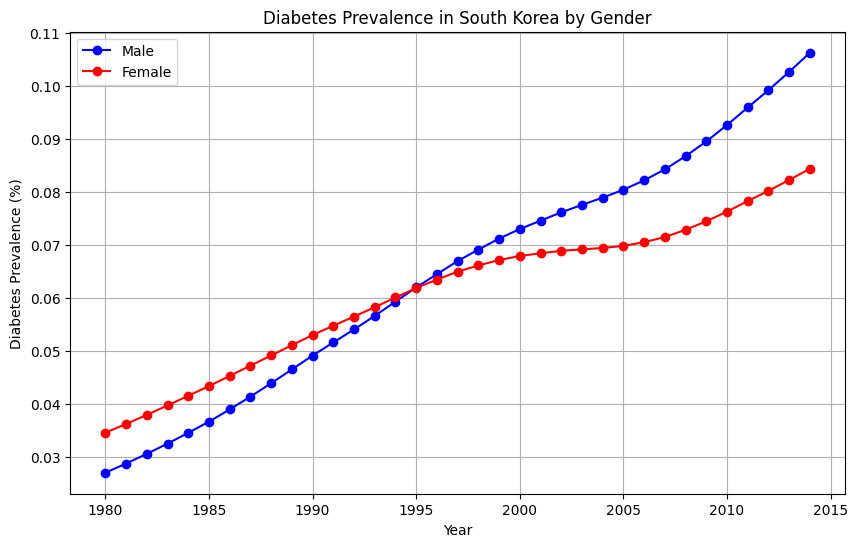

In [3]:
kor_diab = country[country['Country/Region/World'] == 'South Korea']

# 남성과 여성 데이터 분리
male_kor = kor_diab[kor_diab['Sex'] == 'Men']
female_kor = kor_diab[kor_diab['Sex'] == 'Women']

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.plot(male_kor['Year'], male_kor['Crude diabetes prevalence'], marker='o', label='Male', color='blue')
plt.plot(female_kor['Year'], female_kor['Crude diabetes prevalence'], marker='o', label='Female', color='red')

# 타이틀 및 레이블 설정
plt.title('Diabetes Prevalence in South Korea by Gender')
plt.xlabel('Year')
plt.ylabel('Diabetes Prevalence (%)')

# 범례 추가
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


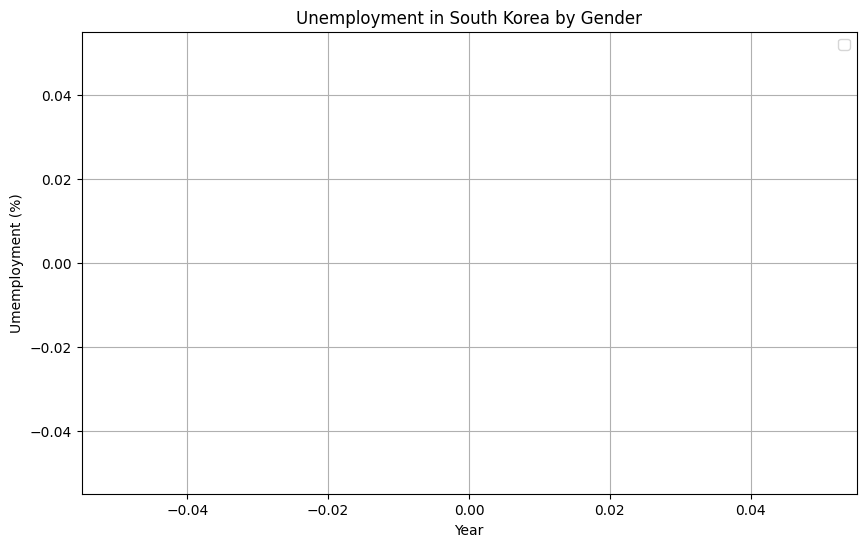

In [5]:
kor_fea = features[features['Country Name'] == 'South Korea']


# 그래프 설정
plt.figure(figsize=(10, 6))
plt.plot(kor_fea['Year'], kor_fea['Unemployment'], marker='o',color='blue')

# 타이틀 및 레이블 설정
plt.title('Unemployment in South Korea')
plt.xlabel('Year')
plt.ylabel('Umemployment (%)')

# 범례 추가
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()


In [45]:
preprocess

,Year,Country Name,Crude diabetes prevalence,IncomeGroup,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable,Education Expenditure %
0,2001,Albania,0.059201,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.45870
1,2001,Albania,0.059201,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.11780
2,2001,Albania,0.059201,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.13823
3,2001,Albania,0.059201,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.22752
4,2001,Albania,0.059201,3,74.288000,4.9,3230.000000,7.139524,18.575001,40.520895,117081.67,140894.78,532324.75,3.28155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16263,2014,United Kingdom,0.076705,4,81.304878,2.5,415600.006104,9.950413,6.110000,98.012224,1200015.45,980262.38,16410158.58,5.66824
16264,2014,United Kingdom,0.076705,4,81.304878,2.5,415600.006104,9.950413,6.110000,98.012224,1200015.45,980262.38,16410158.58,5.55960
16265,2014,United Kingdom,0.076705,4,81.304878,2.5,415600.006104,9.950413,6.110000,98.012224,1200015.45,980262.38,16410158.58,5.55960
16266,2014,United Kingdom,0.076705,4,81.304878,2.5,415600.006104,9.950413,6.110000,98.012224,1200015.45,980262.38,16410158.58,5.50078


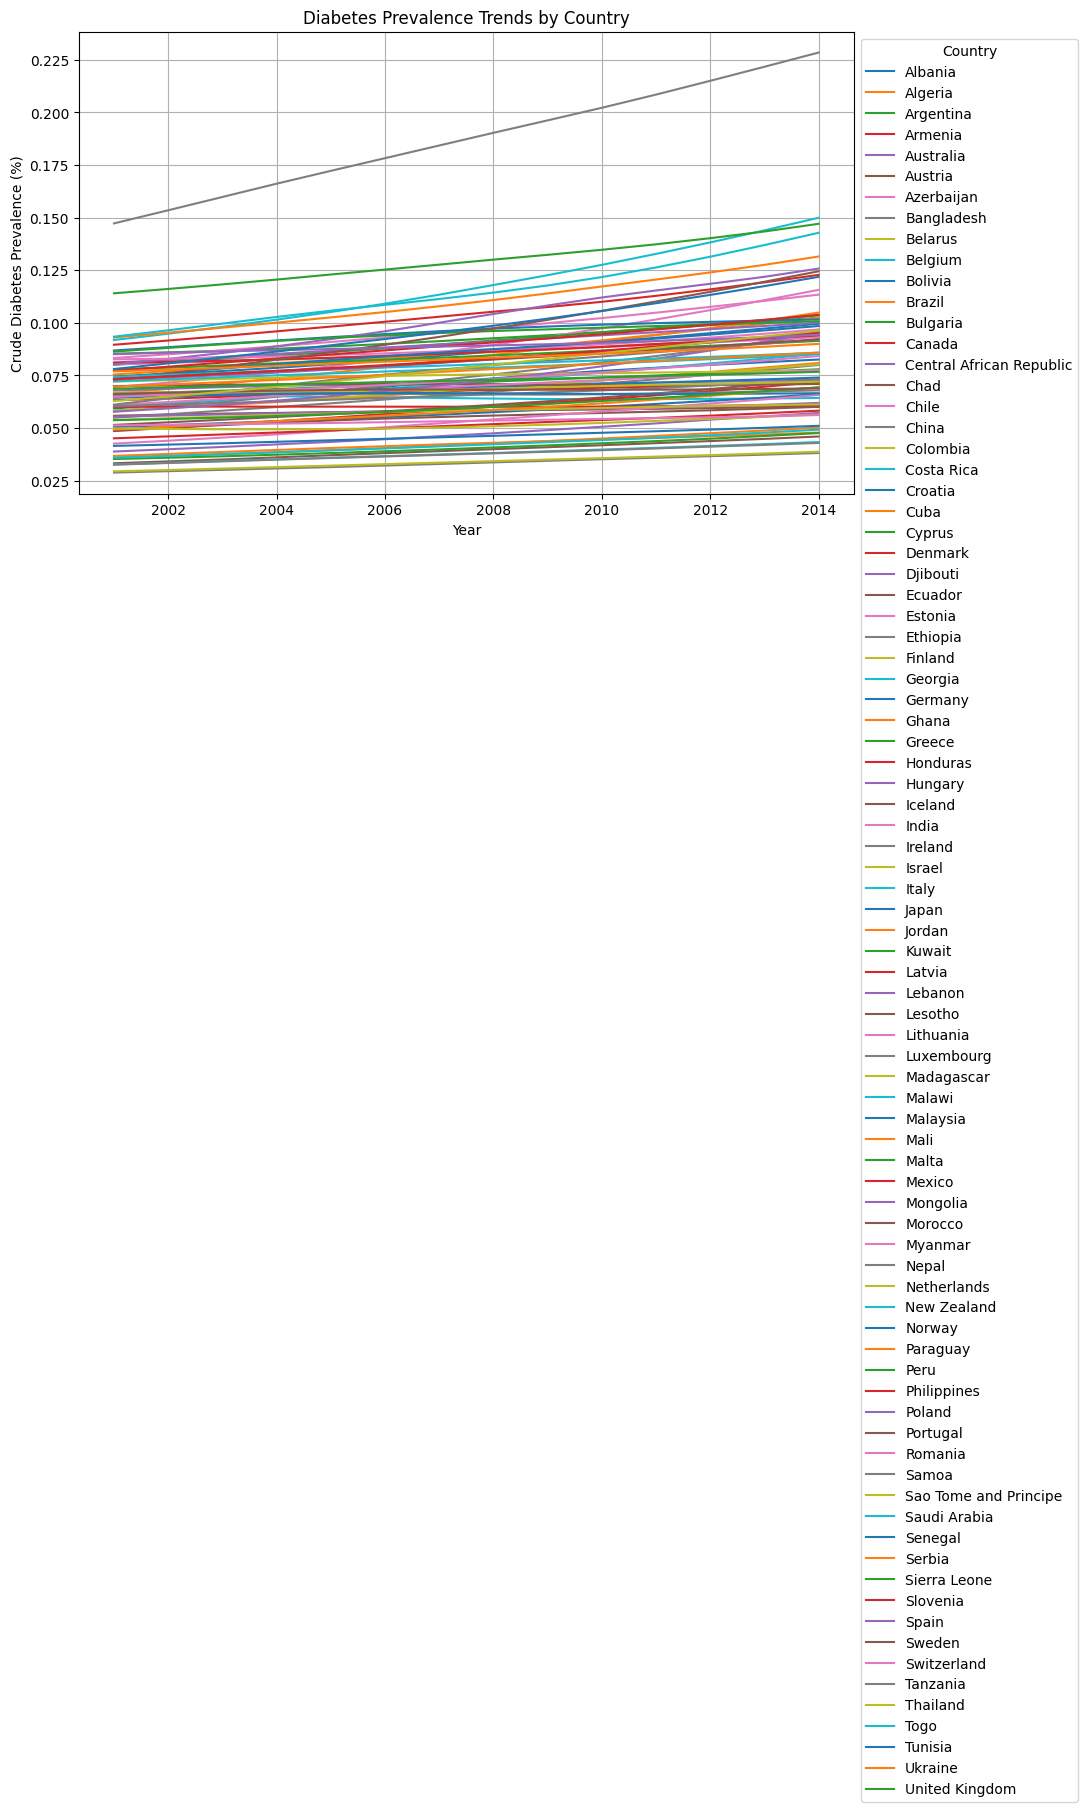

In [87]:
# 데이터 프레임을 국가별로 그룹화하고 각 그룹에 대한 그래프를 그림
fig, ax = plt.subplots(figsize=(10, 6))  # 그래프의 크기 설정

for name, group in preprocess.groupby('Country Name'):
    group.plot(x='Year', y='Crude diabetes prevalence', ax=ax, label=name)

plt.title('Diabetes Prevalence Trends by Country')
plt.xlabel('Year')
plt.ylabel('Crude Diabetes Prevalence (%)')
plt.grid(True)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1,1))
plt.show()

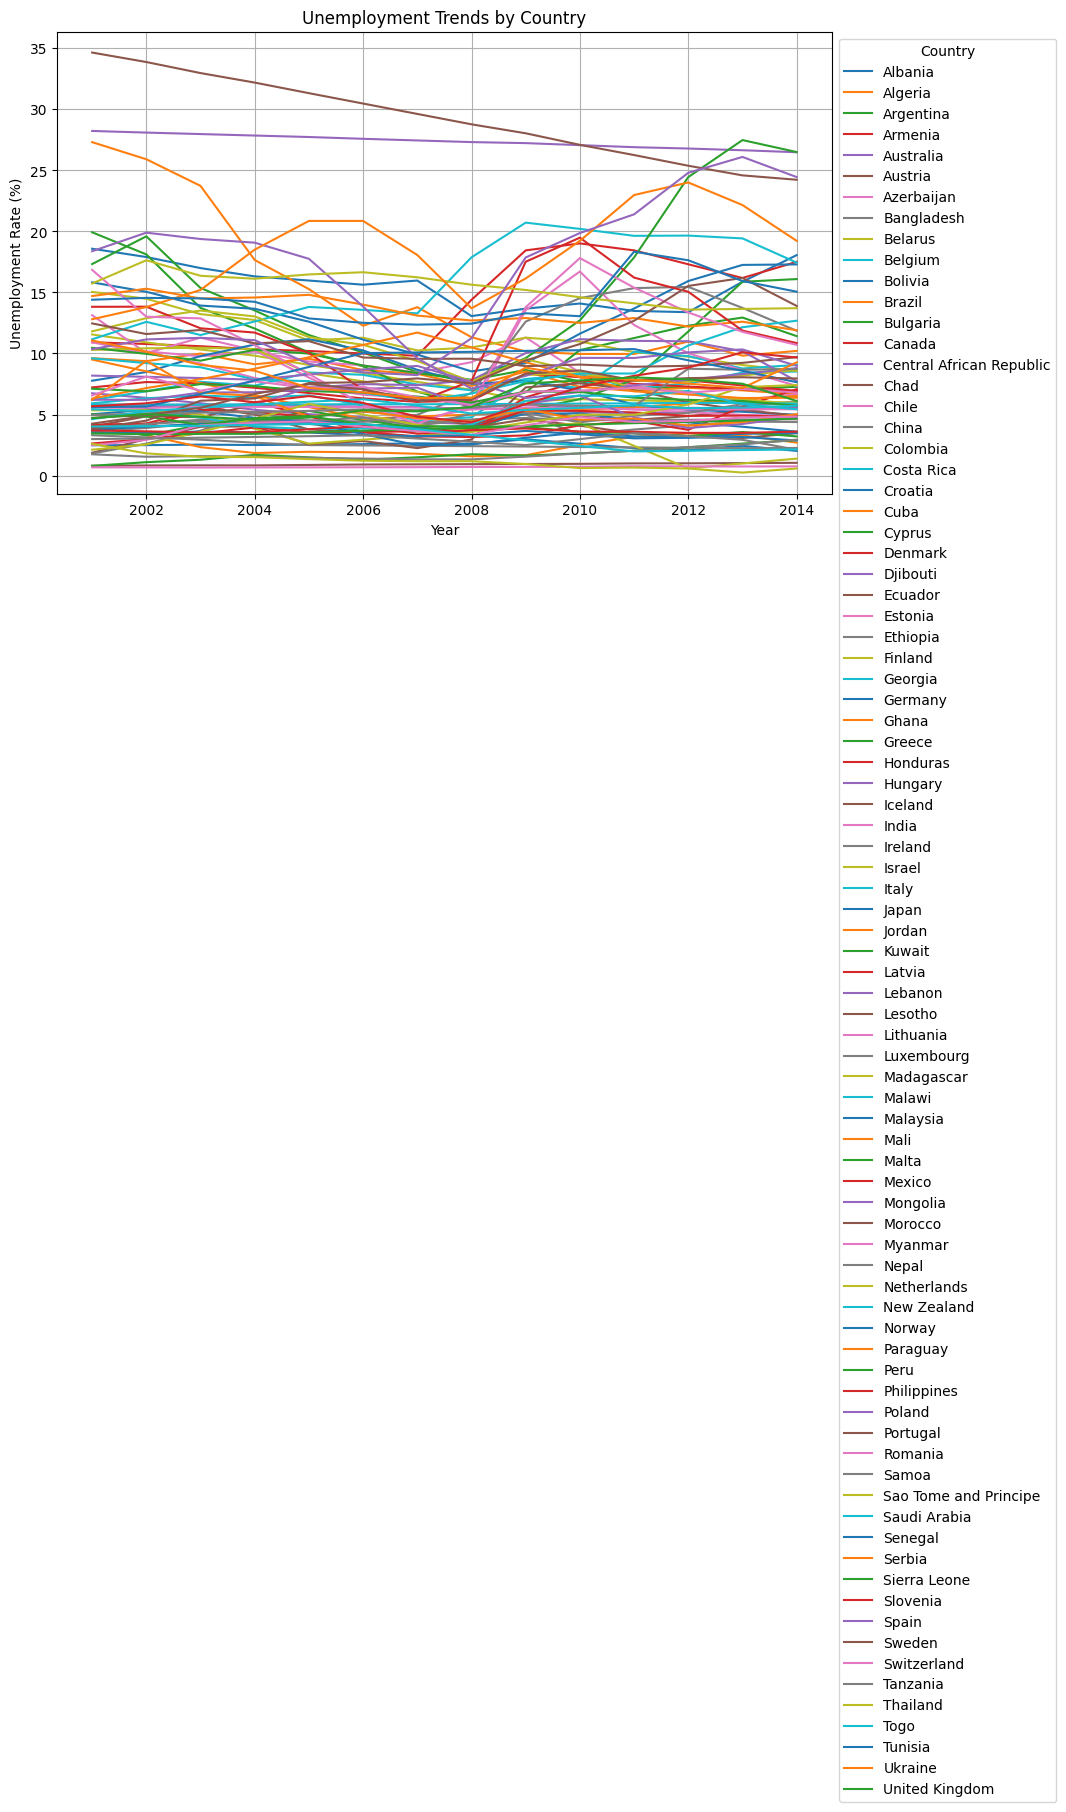

In [88]:
# 데이터 프레임을 국가별로 그룹화하고 각 그룹에 대한 그래프를 그림
fig, ax = plt.subplots(figsize=(10, 6))  # 그래프의 크기 설정

for name, group in preprocess.groupby('Country Name'):
    group.plot(x='Year', y='Unemployment', ax=ax, label=name)

plt.title('Unemployment Trends by Country')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1,1))
plt.show()

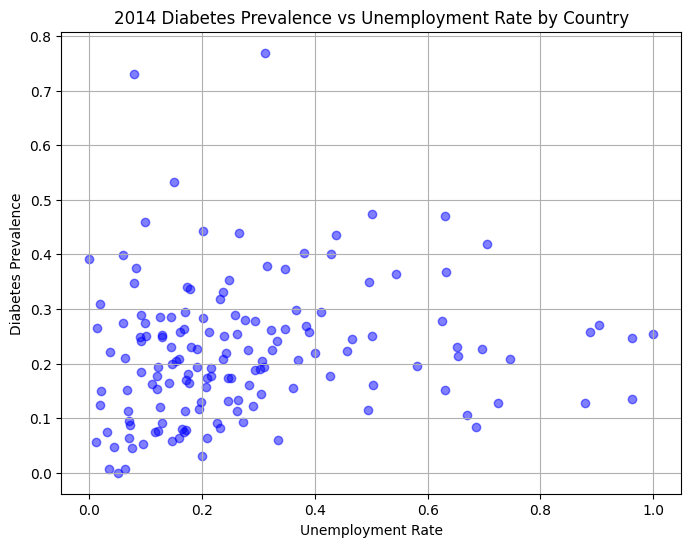

In [79]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

all_2014 = final_df[final_df['Year']==2014]

# 산점도 그리기
# plt.figure(figsize=(10, 6))
# plt.scatter(all_2014['Unemployment'], all_2014['Crude diabetes prevalence'], color='blue', alpha=0.5)

# 회귀선 계산
# np.polyfit으로 회귀선의 매개변수를 얻고, np.poly1d로 회귀선 함수 생성
# slope, intercept = np.polyfit(all_2014['Unemployment'], all_2014['Crude diabetes prevalence'], 1)
# regression_line = np.poly1d([slope, intercept])

# 스케일러 초기화 및 데이터 스케일링
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(all_2014[['Unemployment', 'Crude diabetes prevalence']]),
                         columns=['Scaled Unemployment', 'Scaled Diabetes Prevalence'])

# 스케일된 데이터로 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Scaled Unemployment'], df_scaled['Scaled Diabetes Prevalence'], color='blue', alpha=0.5)


plt.title('2014 Diabetes Prevalence vs Unemployment Rate by Country')
plt.xlabel('Unemployment Rate')
plt.ylabel('Diabetes Prevalence')
plt.grid(True)
plt.show()

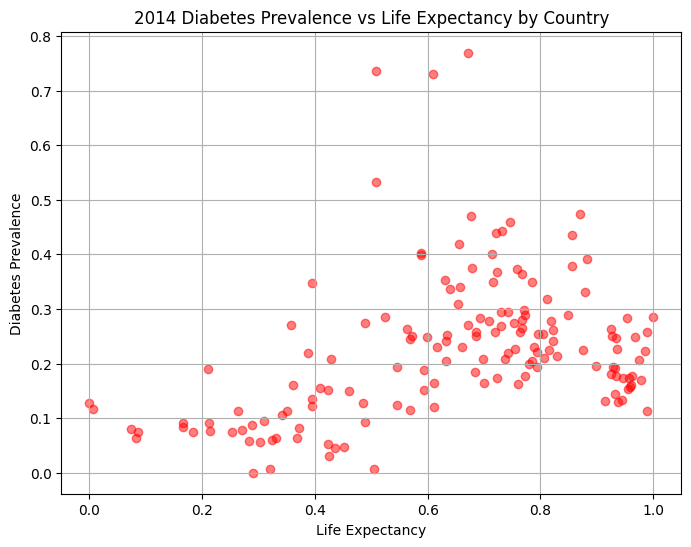

In [81]:
all_2014 = final_df[final_df['Year']==2014]

# 산점도 그리기
# plt.figure(figsize=(10, 6))
# plt.scatter(all_2014['Life Expectancy World Bank'], all_2014['Crude diabetes prevalence'], color='red', alpha=0.5)

# slope, intercept = np.polyfit(all_2014['Life Expectancy World Bank'], all_2014['Crude diabetes prevalence'], 1)
# regression_line = np.poly1d([slope, intercept])

# 스케일러 초기화 및 데이터 스케일링
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(all_2014[['Life Expectancy World Bank', 'Crude diabetes prevalence']]),
                         columns=['Scaled Life Expectancy', 'Scaled Diabetes Prevalence'])

# 스케일된 데이터로 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Scaled Life Expectancy'], df_scaled['Scaled Diabetes Prevalence'], color='red', alpha=0.5)



plt.title('2014 Diabetes Prevalence vs Life Expectancy by Country')
plt.xlabel('Life Expectancy')
plt.ylabel('Diabetes Prevalence')
plt.grid(True)
plt.show()

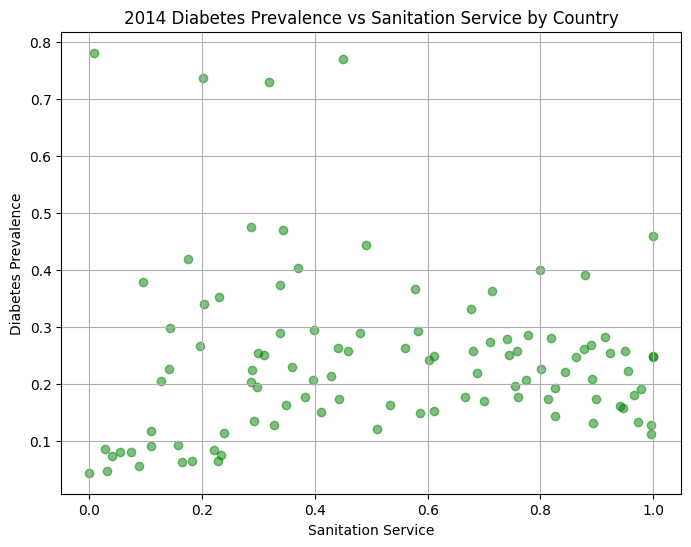

In [85]:
# diab_2014 = preprocess[preprocess['Year']==2014]

# 스케일러 초기화 및 데이터 스케일링
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(all_2014[['Sanitation', 'Crude diabetes prevalence']]),
                         columns=['Scaled Sanitation', 'Scaled Diabetes Prevalence'])

# 스케일된 데이터로 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Scaled Sanitation'], df_scaled['Scaled Diabetes Prevalence'], color='green', alpha=0.5)



plt.title('2014 Diabetes Prevalence vs Sanitation Service by Country')
plt.xlabel('Sanitation Service')
plt.ylabel('Diabetes Prevalence')
plt.grid(True)
plt.show()

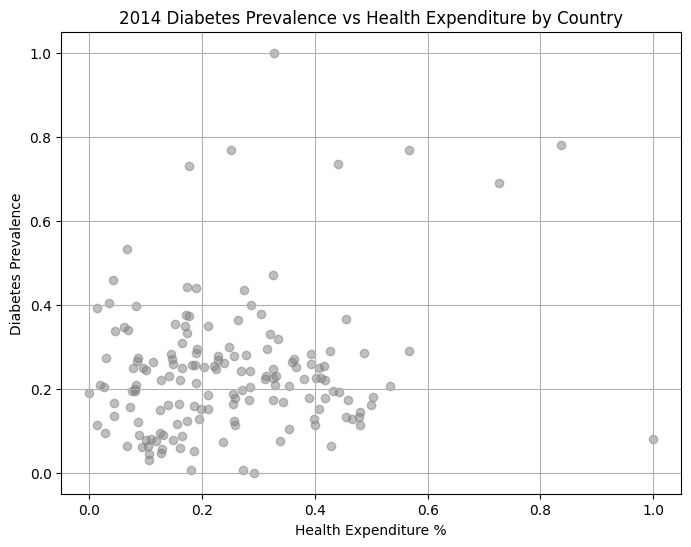

In [84]:
# diab_2014 = preprocess[preprocess['Year']==2014]

# 스케일러 초기화 및 데이터 스케일링
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(all_2014[['Health Expenditure %', 'Crude diabetes prevalence']]),
                         columns=['Scaled Health Expenditure %', 'Scaled Diabetes Prevalence'])

# 스케일된 데이터로 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Scaled Health Expenditure %'], df_scaled['Scaled Diabetes Prevalence'], color='grey', alpha=0.5)



plt.title('2014 Diabetes Prevalence vs Health Expenditure by Country')
plt.xlabel('Health Expenditure %')
plt.ylabel('Diabetes Prevalence')
plt.grid(True)
plt.show()



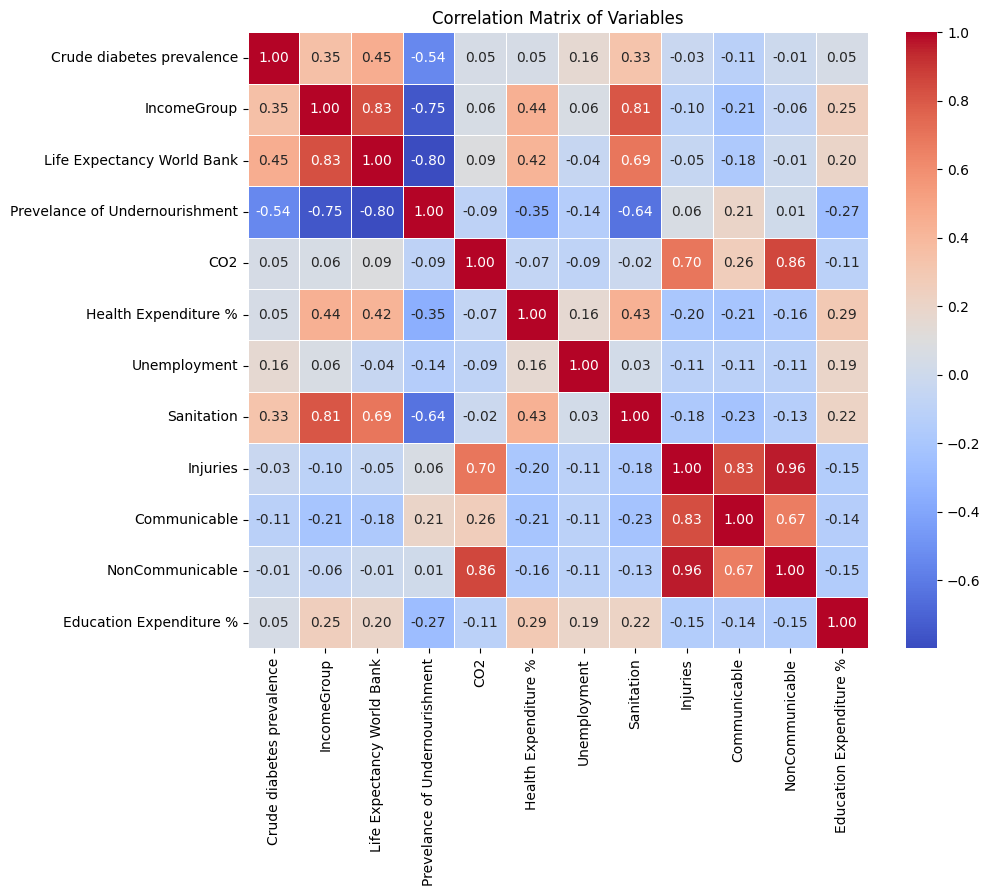

In [89]:
# 상관관계 계산
correlation_matrix = variables.corr()

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

Pearson Correlation: 0.15707563383693135
P-value: 2.2855038637770334e-90


/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


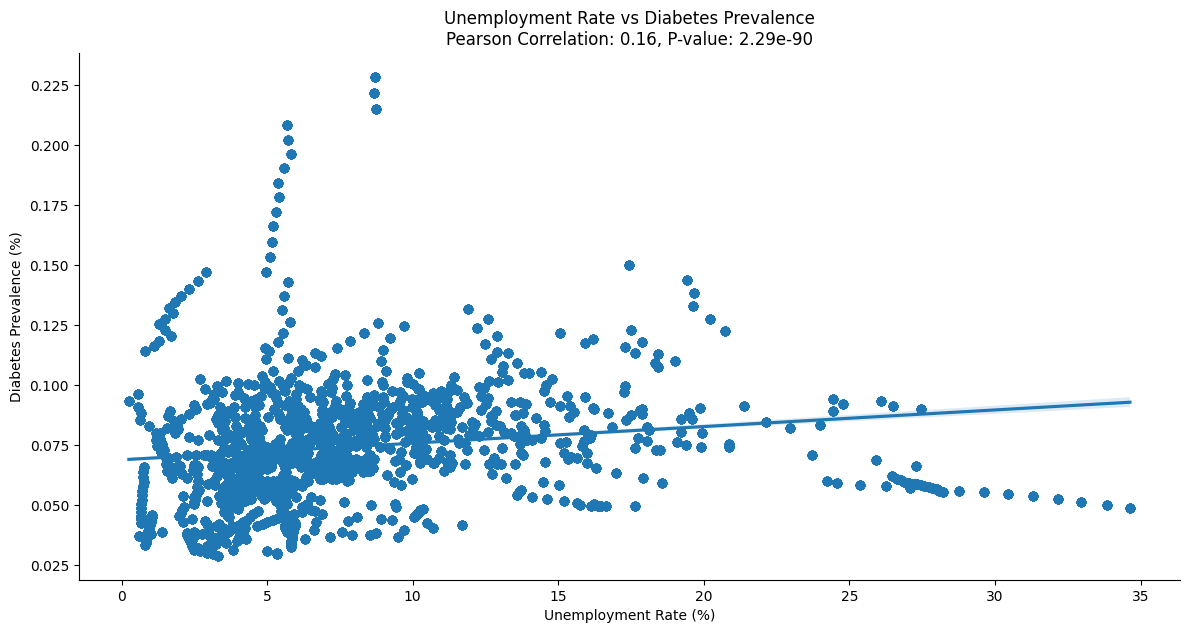

In [12]:
# 전체 나라 데이터 상관계수

import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 계산
correlation, p_value = pearsonr(data['Unemployment'], data['Crude diabetes prevalence'])

# 결과 출력
print(f'Pearson Correlation: {correlation}')
print(f'P-value: {p_value}')

# 시각화
sns.lmplot(x='Unemployment', y='Crude diabetes prevalence', data=data, aspect=2, height=6)
plt.title(f'Unemployment Rate vs Diabetes Prevalence\nPearson Correlation: {correlation:.2f}, P-value: {p_value:.2e}')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Diabetes Prevalence (%)')
plt.show()

In [10]:
import pandas as pd
from scipy.stats import pearsonr

# 나라별로 그룹화하여 상관계수 계산
correlation_results = []

for country in data['Country Name'].unique():
    country_data = data[data['Country Name'] == country]
    if len(country_data) > 1:
        correlation, p_value = pearsonr(country_data['Unemployment'], country_data['Crude diabetes prevalence'])
        correlation_results.append({
            'Country': country,
            'Correlation': correlation,
            'P-value': p_value
        })

# 데이터프레임으로 변환하여 상관계수 높은 순으로 정렬
correlation_df = pd.DataFrame(correlation_results)
top_countries = correlation_df.nlargest(10, 'Correlation')

# 결과 출력
print(top_countries)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
         Country  Correlation        P-value
15          Chad     0.992485  5.821216e-179
72  Sierra Leone     0.990670  6.999025e-170
65      Portugal     0.956264  1.609718e-105
42        Kuwait     0.941239   2.130823e-93
56       Myanmar     0.933643   1.941705e-88
49        Malawi     0.888262   1.828247e-67
74         Spain     0.881155   5.061139e-65
37       Ireland     0.859447   1.963781e-58
53        Mexico     0.855815   1.937792e-57
29       Georgia     0.838832   3.976536e-53


In [12]:
data['Country Name'].unique()

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium',
       'Bolivia', 'Brazil', 'Bulgaria', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Djibouti',
       'Ecuador', 'Estonia', 'Ethiopia', 'Finland', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kuwait',
       'Latvia', 'Lebanon', 'Lesotho', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Mexico',
       'Mongolia', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands',
       'New Zealand', 'Norway', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Romania', 'Samoa', 'Sao Tome and Principe',
       'Saudi Arabia', 'Senegal', 'Serbia', 'Sierra Leone', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Tanza

In [11]:
correlation_df[correlation_df['Country']=='South Korea']

,Country,Correlation,P-value


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_87923/838636067.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chad_data[['Crude diabetes prevalence', 'Unemployment']] = scaler.fit_transform(chad_data[['Crude diabetes prevalence', 'Unemployment']])


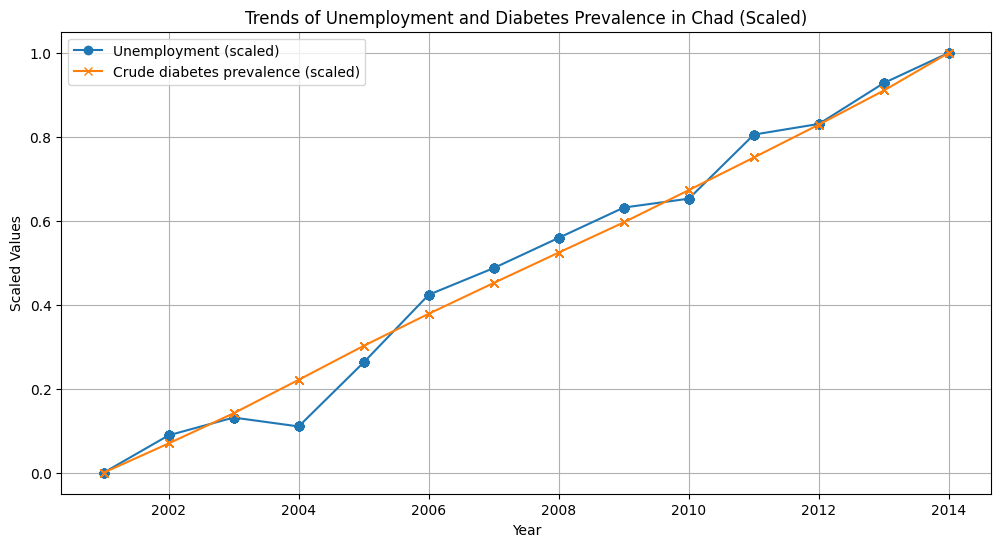

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 'Chad' 데이터 필터링
chad_data = data[data['Country Name'] == 'Chad']

# 스케일링을 위한 데이터 준비
scaler = MinMaxScaler()

# 실업률과 당뇨병 데이터를 스케일링
chad_data[['Crude diabetes prevalence', 'Unemployment']] = scaler.fit_transform(chad_data[['Crude diabetes prevalence', 'Unemployment']])

# 연도별 실업률과 당뇨병 추이를 비교하는 선그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(chad_data['Year'], chad_data['Unemployment'], marker='o', label='Unemployment (scaled)')
plt.plot(chad_data['Year'], chad_data['Crude diabetes prevalence'], marker='x', label='Crude diabetes prevalence (scaled)')

plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Trends of Unemployment and Diabetes Prevalence in Chad (Scaled)')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_87923/1519351474.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Portugal_data[['Crude diabetes prevalence', 'Unemployment']] = scaler.fit_transform(Portugal_data[['Crude diabetes prevalence', 'Unemployment']])


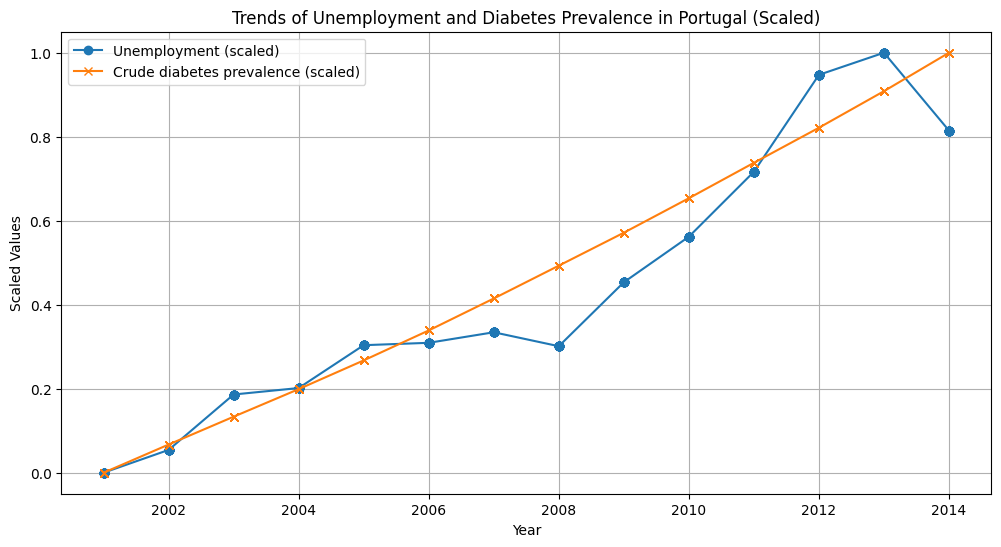

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 'Chad' 데이터 필터링
Portugal_data = data[data['Country Name'] == 'Portugal']

# 스케일링을 위한 데이터 준비
scaler = MinMaxScaler()

# 실업률과 당뇨병 데이터를 스케일링
Portugal_data[['Crude diabetes prevalence', 'Unemployment']] = scaler.fit_transform(Portugal_data[['Crude diabetes prevalence', 'Unemployment']])

# 연도별 실업률과 당뇨병 추이를 비교하는 선그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(Portugal_data['Year'], Portugal_data['Unemployment'], marker='o', label='Unemployment (scaled)')
plt.plot(Portugal_data['Year'], Portugal_data['Crude diabetes prevalence'], marker='x', label='Crude diabetes prevalence (scaled)')

plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Trends of Unemployment and Diabetes Prevalence in Portugal (Scaled)')
plt.legend()
plt.grid(True)
plt.show()
